In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import geopandas as gpd
import numpy as np
from collections import Counter

# Load CSV file into DataFrame
data = pd.read_csv("vs_data.csv", encoding="utf-8")

# Preview the data
print(data.head())

df = pd.DataFrame(data)
df.Improvement=df.Improvement.astype(str)

               Age       Location                                   Race  \
0  19?24 years old  North America  Arab / Middle Eastern / North African   
1  25?40 years old  North America  Arab / Middle Eastern / North African   
2  25?40 years old  North America  Arab / Middle Eastern / North African   
3  19?24 years old  North America               Asian / Pacific Islander   
4  19?24 years old  North America  Arab / Middle Eastern / North African   

                    Employment  \
0                    Full time   
1  Contractor or self-employed   
2                    Full time   
3                    Part-time   
4                    Full time   

                                             Reasons  \
0  Because I like their designs and colors, Becau...   
1  Because they're ethically made, Because I like...   
2  Because they're ethically made, Because I like...   
3  Because they're ethically made, Because I like...   
4  Because they're ethically made, Because I like...   

 

In [2]:

df['Age'] = df['Age'].str.replace('?', '-')  #to fix the "?" symbol

In [3]:

# Define categories and keywords/phrases for each category
categories = {
    'Designs': ['design', 'prints', 'nicest', 'pretty', 'fashionable','trendy','researched', 'designed', 'colors', 'colours','unique', 'nice', 'creativity'],
    'Brand Identity & Values': ['brand identity', 'politics', 'values', 'owner', 'support', 'upfront','owners', 'personality','social media'],
    'Quality': ['soft', 'quality', 'fabric', 'breathable', 'featherlight','best', 'softness', 'sizes','silk', 'material','lightweight'],
    'Uniqueness & Exclusivity': ['uniqueness', 'exclusive', 'custom', 'creativity','accesability', 'community', 'recognize','cool'],
    'Comfort & Practicality': ['comfortable', 'breathable', 'featherlight', 'lightweight','modest'],
    'Ethical Business Practices': ['ethical', 'sustainability', 'fair wages'],
    'Other Hijab Brands': ['only shop', 'other','brands'],
    'Brand Loyalty': ['first one I knew', 'loyalty', 'muslim', ]
}

# Create new columns for each category, encoding with 1 if a response mentions the category
for category, keywords in categories.items():
    df[category] = df['Loyalty'].apply(lambda x: 1 if any(keyword in x.lower() for keyword in keywords) else 0)

# Drop the original 'Reasons' column, if needed
df.drop(columns=['Loyalty'], inplace=True)


In [4]:
# Define categories and keywords/phrases for each category
categories = {
    'Slow Drops': ['slow', 'Slow', 'smaller collections'],
    'Quality Control': ['Quality', 'quality', 'stitching', 'consistency', 'fragile', 'snags', 'soft', 'defective', 'smoothness','transparency','coverage', 'see through'],
    'Customer Service': ['transparent', 'reimbursements', 'withhold'],
    'Restock': ['restock','older designs', 'run out', 'restocking' ],
    'Affordability': ['expensive', 'cheaper', 'sales'],
    'Design': ['color theory', 'prints', 'colors','prints']
}

# Create new columns for each category, encoding with 1 if a response mentions the category
for category, keywords in categories.items():
    df[category] = df['Improvement'].apply(lambda x: 1 if any(keyword in x.lower() for keyword in keywords) else 0)

# Drop the original 'Reasons' column, if needed
df.drop(columns=['Improvement'], inplace=True)




Designs
1    17
0    14
Name: count, dtype: int64


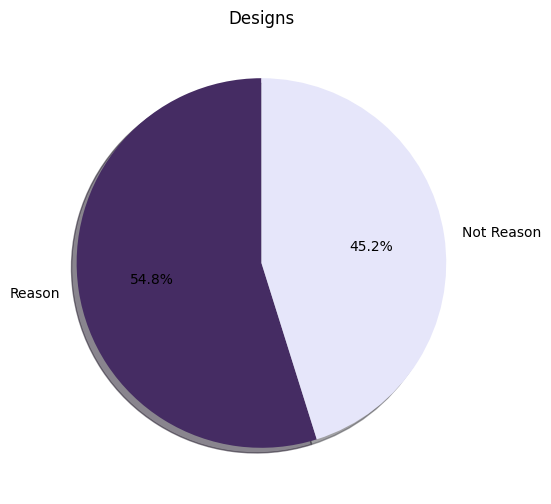

Quality
1    12
0    19
Name: count, dtype: int64


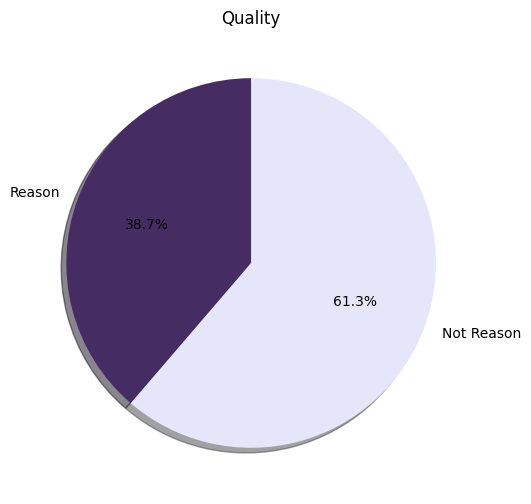

Brand Identity & Values
1     6
0    25
Name: count, dtype: int64


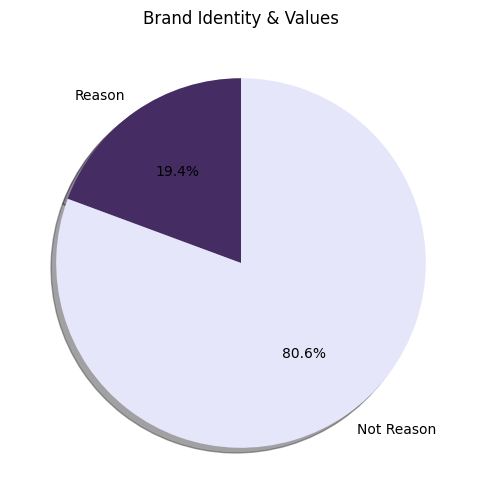

Uniqueness & Exclusivity
1     8
0    23
Name: count, dtype: int64


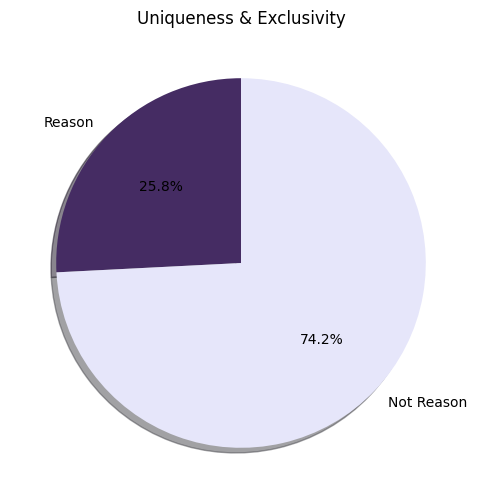

Comfort & Practicality
1     3
0    28
Name: count, dtype: int64


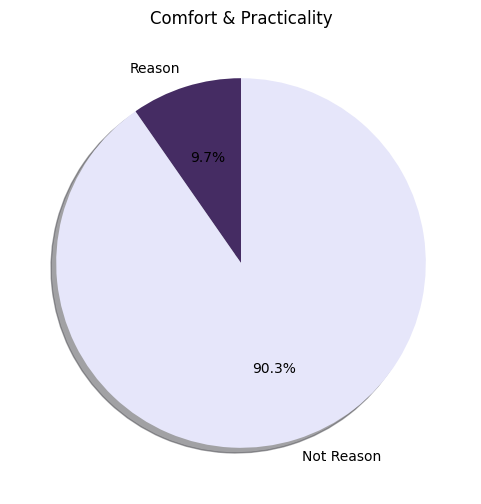

Other Hijab Brands
1     7
0    24
Name: count, dtype: int64


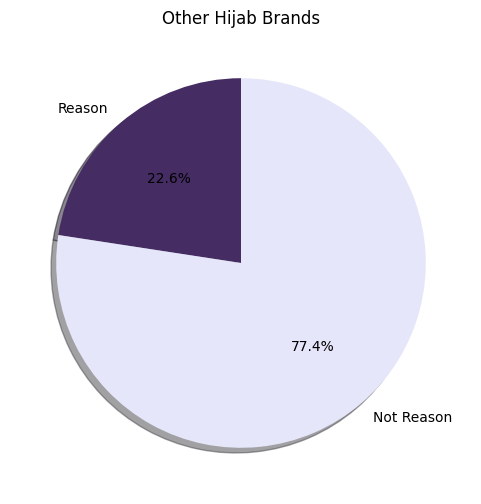

In [5]:
#Pie charts for binary values ("Loyalty")

reasons_improve=['Designs', 'Quality', 'Brand Identity & Values',
                                     'Uniqueness & Exclusivity', 
                                     'Comfort & Practicality', 'Other Hijab Brands']

for x in reasons_improve:
    # Count the binary values for each column (1 for mentioned, 0 for not mentioned)
    design_counts = df[x].value_counts().reindex([1, 0], fill_value=0)
    print(design_counts)

    # Labels for the pie chart
    labels = ['Reason', 'Not Reason']
    colors =['#452c63','#E6E6FA']

    # Plot the pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(design_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, shadow=True)
    
    # Set the dynamic title based on the column name
    plt.title(f'{x}')
    
    # Show the pie chart
    plt.show()


Slow Drops
1     4
0    27
Name: count, dtype: int64


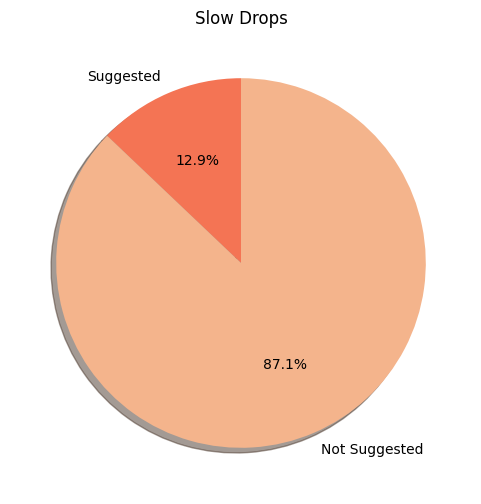

Quality Control
1    17
0    14
Name: count, dtype: int64


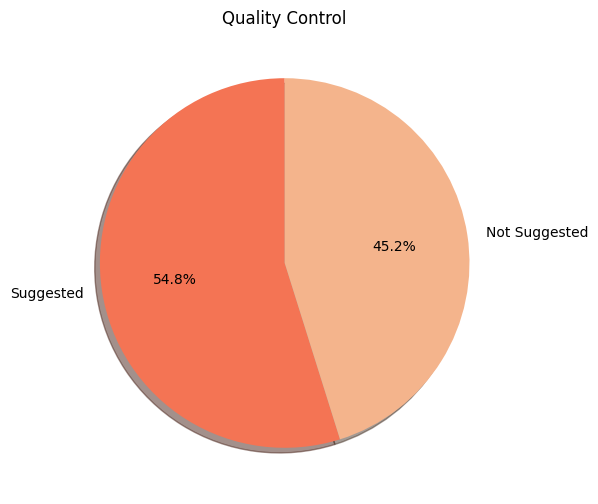

Customer Service
1     3
0    28
Name: count, dtype: int64


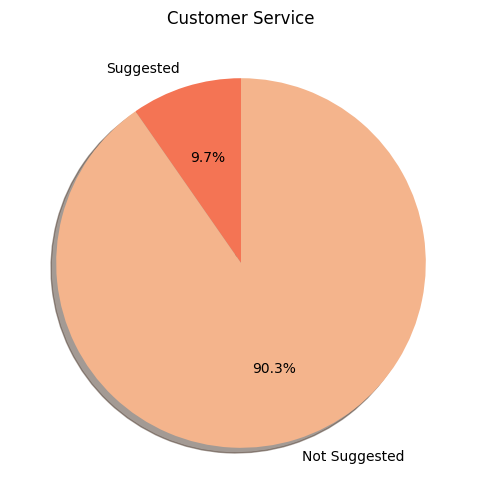

Restock
1     6
0    25
Name: count, dtype: int64


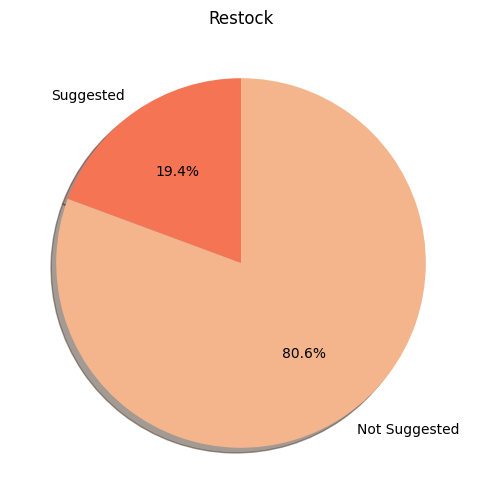

Affordability
1     3
0    28
Name: count, dtype: int64


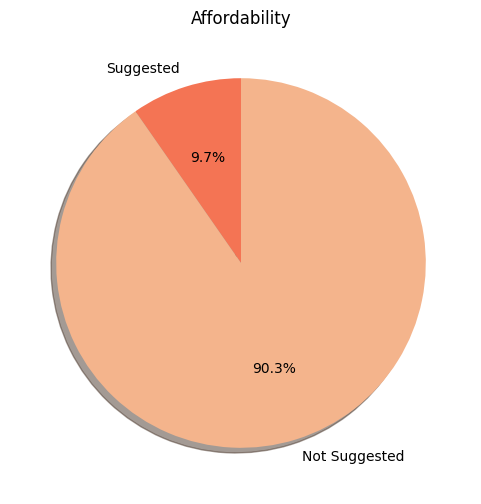

Design
1     7
0    24
Name: count, dtype: int64


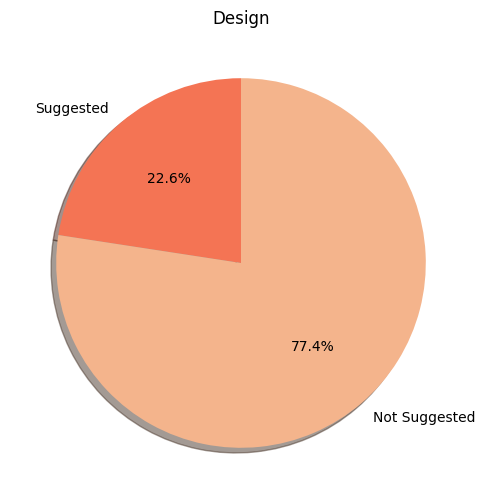

In [6]:
#Improvement Suggestions

reasons_improve=['Slow Drops','Quality Control','Customer Service','Restock','Affordability','Design']

for x in reasons_improve:
    # Count the binary values for each column (1 for mentioned, 0 for not mentioned)
    design_counts = df[x].value_counts().reindex([1, 0], fill_value=0)
    print(design_counts)

    # Labels for the pie chart
    labels = ['Suggested', 'Not Suggested']
    colors =  ['#f47454','#f4b48c'] 

    # Plot the pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(design_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, shadow=True)
    
    # Set the dynamic title based on the column name
    plt.title(f'{x}')
    
    # Show the pie chart
    plt.show()

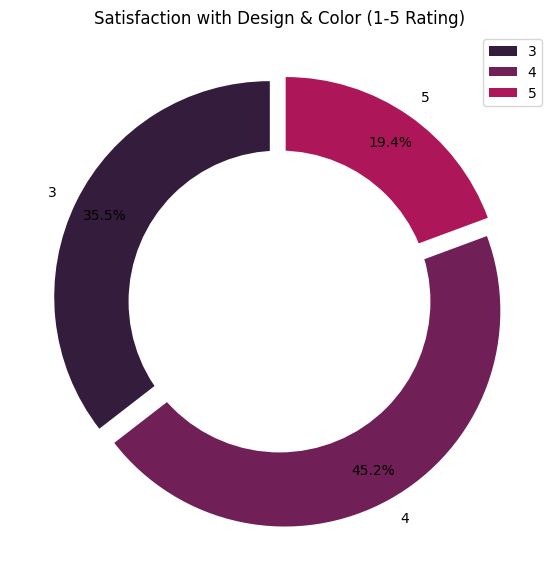

In [7]:

# Setting size in Chart based on 
# given values

satisfy_design_color_counts = df['Satisfy_Design_Color'].value_counts().reindex([3, 4, 5], fill_value=0)

# Define colors and labels for the pie chart
colors = ['#341c3c', '#701f57', '#ad1759', '#e13342', '#f37651']
labels = ['3', '4', '5']  # 1-5 star ratings

# Explosion to emphasize each slice (optional)
explode = (0.05, 0.05, 0.05)

# Plot the pie chart
plt.figure(figsize=(7, 7))
plt.pie(satisfy_design_color_counts, colors=colors, labels=labels, autopct='%1.1f%%', 
        pctdistance=0.85, explode=explode, startangle=90)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
 
# Adding Title of chart
plt.title('Satisfaction with Design & Color (1-5 Rating)')
 
# Add Legends
plt.legend(labels, loc="upper right")
 
# Displaying Chart
plt.show()

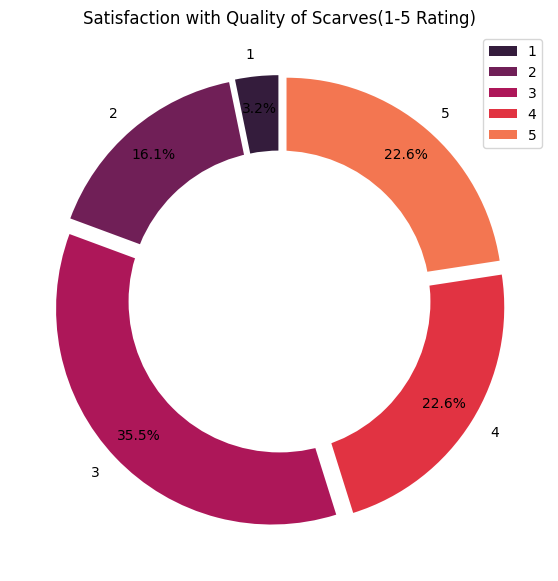

In [8]:
# Setting size in Chart based on 
# given values

satisfy_design_color_counts = df['Satisfy_Quality'].value_counts().reindex([1,2,3, 4, 5], fill_value=0)

# Define colors and labels for the pie chart
colors = ['#341c3c', '#701f57', '#ad1759', '#e13342', '#f37651']
labels = ['1','2','3', '4', '5']  # 1-5 star ratings

# Explosion to emphasize each slice (optional)
explode = (0.05, 0.05, 0.05, 0.05, 0.05)

# Plot the pie chart
plt.figure(figsize=(7, 7))
plt.pie(satisfy_design_color_counts, colors=colors, labels=labels, autopct='%1.1f%%', 
        pctdistance=0.85, explode=explode, startangle=90)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
 
# Adding Title of chart
plt.title('Satisfaction with Quality of Scarves(1-5 Rating)')
 
# Add Legends
plt.legend(labels, loc="upper right")
 
# Displaying Chart
plt.show()

In [9]:
# Ensure 'Other' category transformation is applied properly
df['Reasons'] = df['Reasons'].str.replace(
    "Because they\'re ethically made", 'Ethically Made', regex=False)
df['Reasons'] = df['Reasons'].str.replace(
    "Because I like their designs and colors", "Designs & Colors", regex=False)
df['Reasons'] = df['Reasons'].str.replace(
    "Because I like their fabrics", "Fabric Quality & Variation", regex=False)
df['Reasons'] = df['Reasons'].str.replace(
    "Because I like to support small businesses", "Support Small Businesses", regex=False)

# Handle 'Other' category with careful matching, using str.contains
df.loc[df['Reasons'].str.contains("isn't much material on the velas", case=False, na=False), 'Reasons'] = 'Other'
df.loc[df['Reasons'].str.contains("support islamic businesses", case=False, na=False), 'Reasons'] = 'Other'



C:\Users\amann\AppData\Local\Temp\ipykernel_24404\3940066380.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reason_counts.values, y=reason_counts.index, palette="rocket")


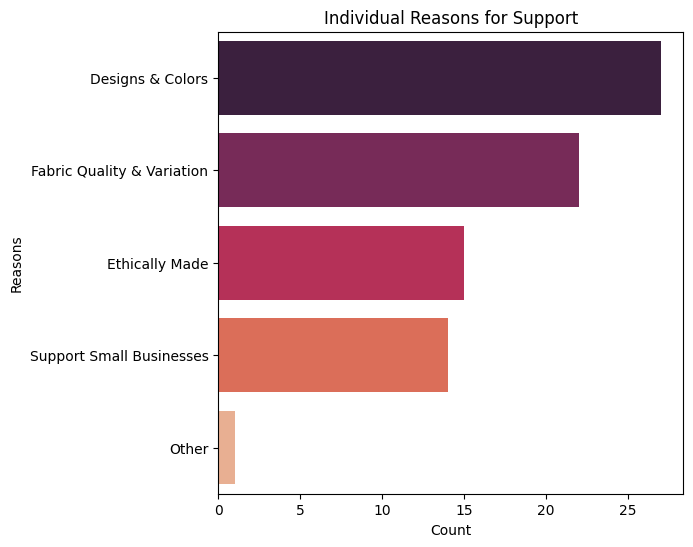

In [10]:
# Strip any extra spaces and hidden characters in the 'Reasons' column
df['Reasons'] = df['Reasons'].str.strip()

# Check the exact row where the problematic value is and drop it
problematic_string = "Ethically Made, Designs & Colors, Fabric Quality & Variation, Support Small Businesses, I like how there isn?t much material on the velas and if i want to do a full coverage style it doesn?t suffocate me."

# Drop the row containing the exact string
df = df[df['Reasons'] != problematic_string]

# Reprocess the 'Reasons' for individual count
split_reasons = df['Reasons'].str.split(',')
all_reasons = [reason.strip() for sublist in split_reasons for reason in sublist]

# Count the occurrences of each individual reason
reason_counts = pd.Series(all_reasons).value_counts()

# Regenerate the horizontal bar chart
plt.figure(figsize=(6, 6))
sns.barplot(x=reason_counts.values, y=reason_counts.index, palette="rocket")
# Add labels and title
plt.xlabel("Count")
plt.ylabel("Reasons")
plt.title("Individual Reasons for Support")

# Show the plot
plt.show()


C:\Users\amann\AppData\Local\Temp\ipykernel_24404\3313898323.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = mpl.cm.get_cmap('Greens')  # Correct reference to colormap


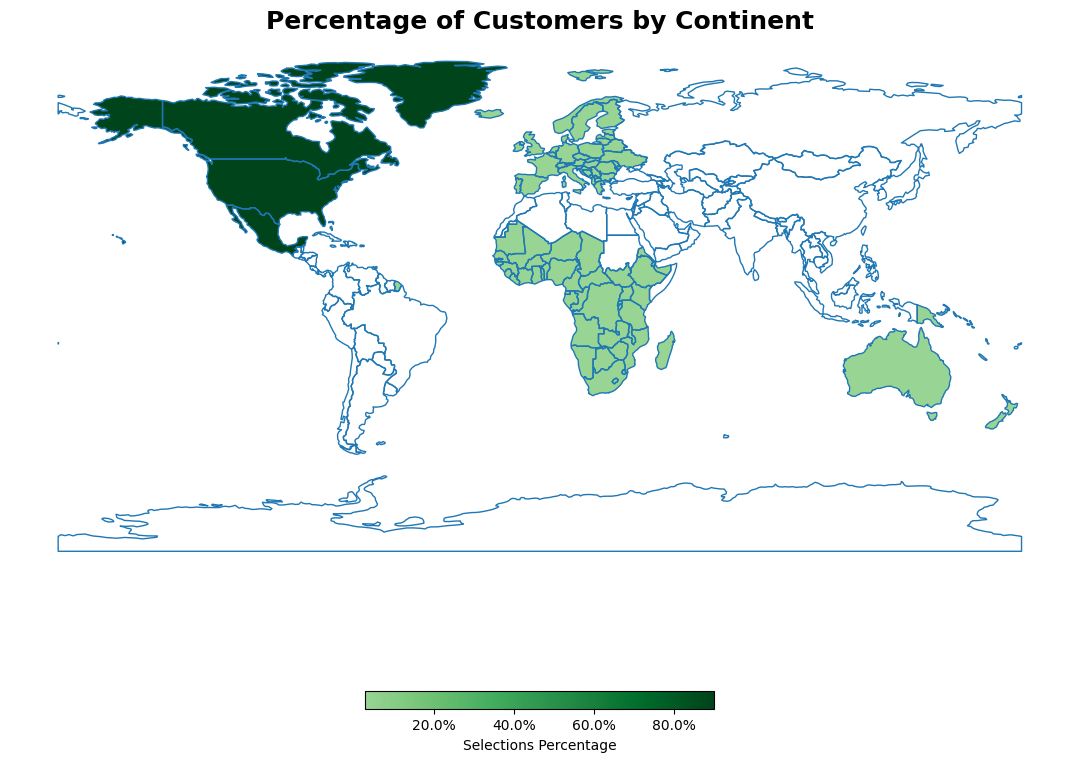

In [11]:
# Calculate counts for each category
category_counts = df['Location'].value_counts()

# Calculate percentages
category_percentages = category_counts / category_counts.sum() * 100

# Create a new DataFrame with percentages
result_df = pd.DataFrame({'category': category_percentages.index, 'percentage': category_percentages.values})

cmap = mpl.cm.get_cmap('Greens')  # Correct reference to colormap

# Make a new colormap that is darker on the light side
darker_cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'darker_greens', cmap(np.linspace(0.4, 1.0, 100))  # Use only the darker part of 'Greens'
)


# Assuming df is your dataframe with a 'Location' column
data = {
    'Location': ['North America', 'South America', 'Asia', 'Middle East', 'Europe', 
                 'Africa', 'Australia/Oceania', 'Caribbean/Pacific Islands', 'I prefer not to answer']
}

# Load the downloaded Natural Earth shapefile (update the path to where you saved the file)
shapefile_path = 'C://Users//amann//Documents//ne_110m_admin_0_countries'
world = gpd.read_file(shapefile_path)

# Define a mapping from the 'Location' column to continents or specific regions
continent_mapping = {
    'North America': ['Canada', 'United States of America', 'Mexico','Greenland','Puerto Rico'],
    'South America': ['Brazil', 'Argentina', 'Colombia', 'Chile', 'Peru','Bolivia',
                      'Ecuador','Guyana','Paraguay','Peru','Suriname','Uruguay','Venezuela',
                      'French Guiana','Falkland Is.','Panama','Costa Rica','Nicaragua',
                      'El Salvador'],
    'Asia': ['Afghanistan', 'Armenia', 'Azerbaijan','Bangladesh', 'Bhutan', 
             'Brunei','Cambodia', 'China', 'Cyprus','Georgia','India', 'Indonesia',
             'Japan', 'Kazakhstan', 'Kyrgyzstan','Laos','Malaysia', 'Maldives', 
             'Mongolia', 'Myanmar','Nepal', 'North Korea','Pakistan','Philippines',
             'Russia','Singapore', 'South Korea', 'Sri Lanka', 'Taiwan', 
             'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan',
             'Uzbekistan','Vietnam','Iran'],
    'Middle East': ['Saudi Arabia', 'United Arab Emirates', 'Israel', 'Iraq', 'Yemen',
                    'Syria', 'Qatar','Palestine', 'Oman','Lebanon','Kuwait','Jordan','Bahrain',
                    'Egypt','Libya','Tunisia','Sudan','Morocco','Algeria', 'Somalia','W. Sahara'],
    'Europe': ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus','Czech Republic', 'Denmark', 'Estonia',
               'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 
               'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 
               'Slovakia', 'Slovenia','Spain', 'Sweden','Norway','Belarus','Ukraine','Moldova','Albania',
               'Switzerland','Czechia','Iceland','United Kingdom','N. Cyprus','Bosnia and Herz.','North Macedonia',
               'Serbia','Montenegro','Kosovo'],
    'Africa': ['Angola','Benin', 'Botswana', 'Burkina Faso', 'Burundi','Cabo Verde', 'Cameroon',
               'Central African Rep.', 'Chad', 'Comoros','Congo', 'Dem. Rep. Congo','Djibouti','Guinea',
               'Eritrea', 'Eswatini', 'Ethiopia','Gabon', 'Gambia', 'Ghana', 'Eq. Guinea', 'Guinea-Bissau',
               'Ivory Coast ','Kenya','Lesotho', 'Liberia','Madagascar', 'Malawi','Mali', 'Mauritania', 
               'Mauritius', 'Mozambique','Namibia', 'Niger','Nigeria','Rwanda','Sao Tome and Principe', 
               'Senegal','Seychelles', 'Sierra Leone', 'Côte d\'Ivoire','South Africa', 'South Sudan',
               'Tanzania', 'Togo','Uganda','Zambia', 'Zimbabwe','eSwatini','Somaliland','S. Sudan'],
    'Australia/Oceania': ['Australia', 'New Zealand', 'Papua New Guinea','Tasmania','Vanuatu','New Caledonia',
                          'Solomon Is.'],
    'Caribbean/Pacific Islands': ['Cuba', 'Haiti', 'Fiji', 'Samoa', 'Grenada','Barbados','Saint Luis',
                                  'Dominican Rep.', 'Bahamas','Jamaica','Saint Kitts and Nevis',
                                  'Saint Vincent and the Grenadines','Dominica','Trinidad and Tobago',
                                  'Belize','Caribbean Netherlands','Sint Maarten','Guatemala','Honduras',
                                  'Turks and Caicos'],
    'I prefer not to answer': []  # Handle separately if needed
}

# Create a new column in the world GeoDataFrame for percentage of selections
world['Percentage'] = 0.0  # Initialize with 0% for countries that were not selected

# Loop through the continent mapping and assign the percentage
for region, countries in continent_mapping.items():
    # Get the percentage for the region (if it exists in result_df)
    percentage = result_df[result_df['category'] == region]['percentage'].values
    if len(percentage) > 0:
        # Set the percentage for all countries in the corresponding region
        world.loc[world['NAME'].isin(countries), 'Percentage'] = percentage[0]

# Update the label formatter to display percentages
def label_formatter(feature):
    location = feature['NAME']
    percentage = world.loc[world['NAME'] == location, 'Percentage'].values[0]  # Get percentage for location
    return f"{location} - {percentage:.1f}%"  # Format label with location and percentage (one decimal)
vmin = 3 # Minimum value for the colormap
vmax = 90  # Maximum value for the colormap (assuming percentages range from 0 to 100)

# Plot the map with heat based on percentages
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1)

# Plot with adjusted colormap depth
world[world['Percentage'] > 0].plot(
    column='Percentage', 
    ax=ax, 
    legend=True, 
    cmap=darker_cmap,  # You can change 'Reds' to another colormap
    vmin=vmin,  # Set minimum value for color scale
    vmax=vmax,  # Set maximum value for color scale
    legend_kwds={'label': "Selections Percentage", 'shrink': 0.3, 'orientation': 'horizontal','format': '%.1f%%'}
)

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# Remove plot spines for a clean look
for edge in ['right', 'bottom', 'top', 'left']:
    ax.spines[edge].set_visible(False)

ax.set_title('Percentage of Customers by Continent', size=18, weight='bold')
plt.show()


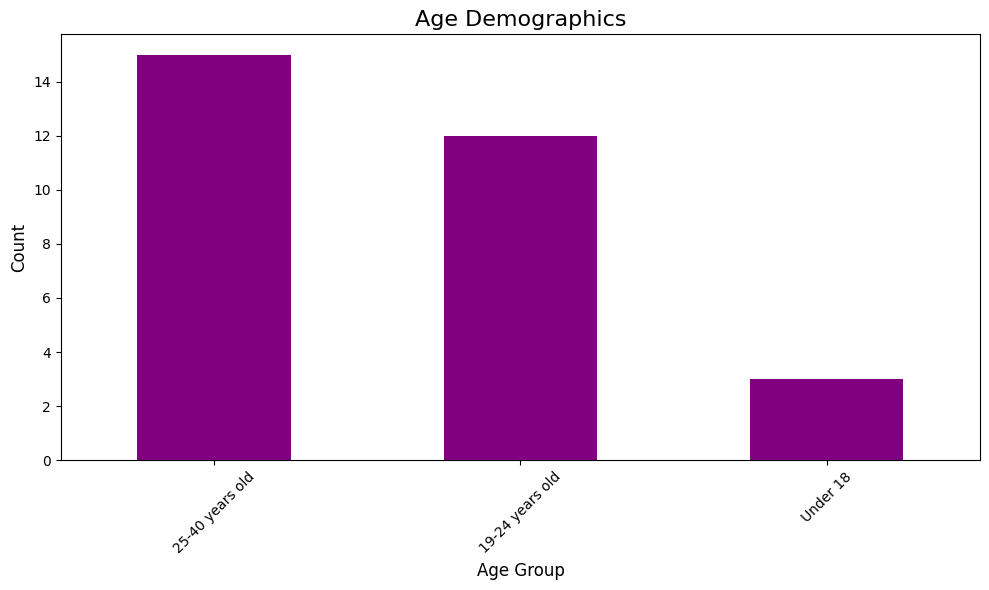

In [12]:
# Assuming df['Age'] contains the age demographic data
# Count the occurrences of each age group
age_counts = df['Age'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
age_counts.plot(kind='bar', color='purple')

# Add titles and labels
plt.title("Age Demographics", fontsize=16)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Rotate the x labels for better readability
plt.xticks(rotation=45)

# Display the bar chart
plt.tight_layout()
plt.show()

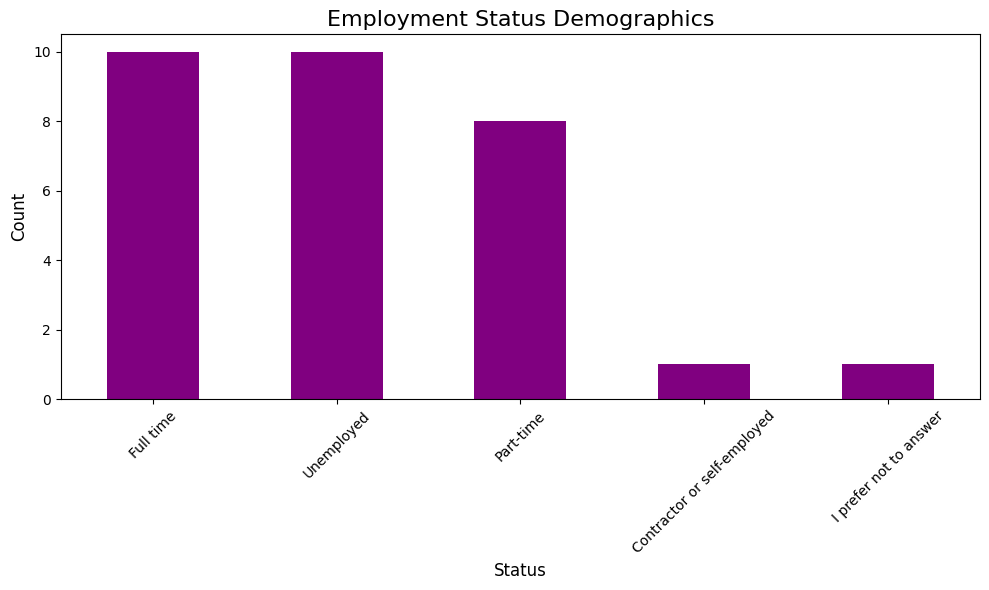

In [13]:
# Assuming df['Age'] contains the age demographic data
# Count the occurrences of each age group

df.loc[df['Employment'].str.contains("student", case=False, na=False), 'Employment'] = 'Unemployed'
emp_counts = df['Employment'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
emp_counts.plot(kind='bar', color='purple')

# Add titles and labels
plt.title("Employment Status Demographics", fontsize=16)
plt.xlabel("Status", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Rotate the x labels for better readability
plt.xticks(rotation=45)

# Display the bar chart
plt.tight_layout()
plt.show()

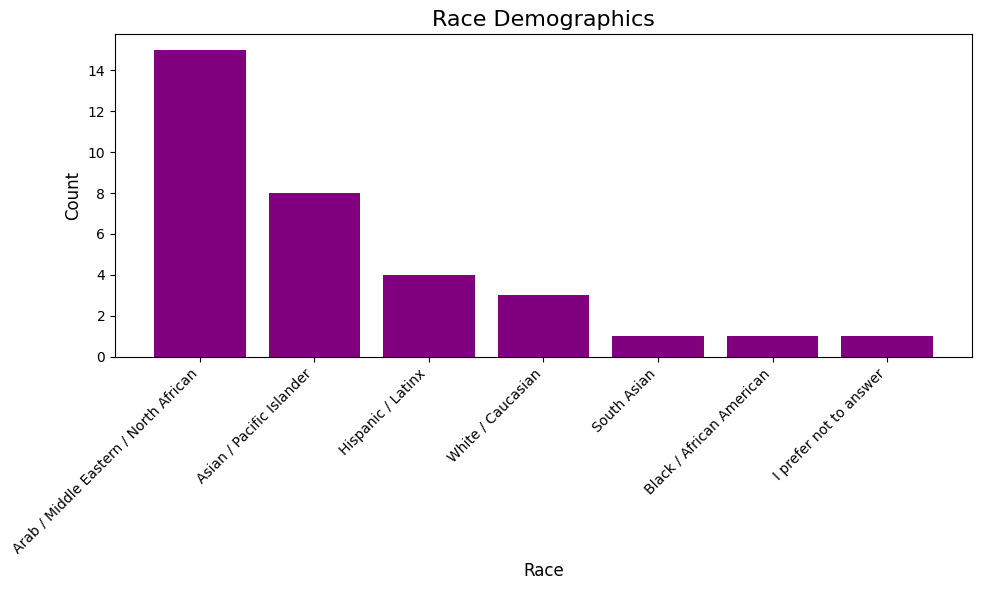

In [14]:

# Assuming df['Race'] contains the demographic data and combined values
# Step 1: Split the combined values by ',' and create a list of individual values
split_race_values = df['Race'].str.split(',')

# Step 2: Flatten the list and remove any extra spaces around the values
flattened_race_values = [item.strip() for sublist in split_race_values for item in sublist]

# Step 3: Use Counter to count the occurrences of each individual race
race_counts = Counter(flattened_race_values)

# Step 4: Convert the Counter object to a DataFrame for easier plotting (optional)
race_counts_df = pd.DataFrame(race_counts.items(), columns=['Race', 'Count'])
# Sort the race_counts_df by the 'Count' column in descending order
race_counts_df = race_counts_df.sort_values(by='Count', ascending=False)

# Step 5: Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(race_counts_df['Race'], race_counts_df['Count'], color='purple')

# Add titles and labels
plt.title("Race Demographics", fontsize=16)
plt.xlabel("Race", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Rotate the x labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the bar chart
plt.tight_layout()
plt.show()


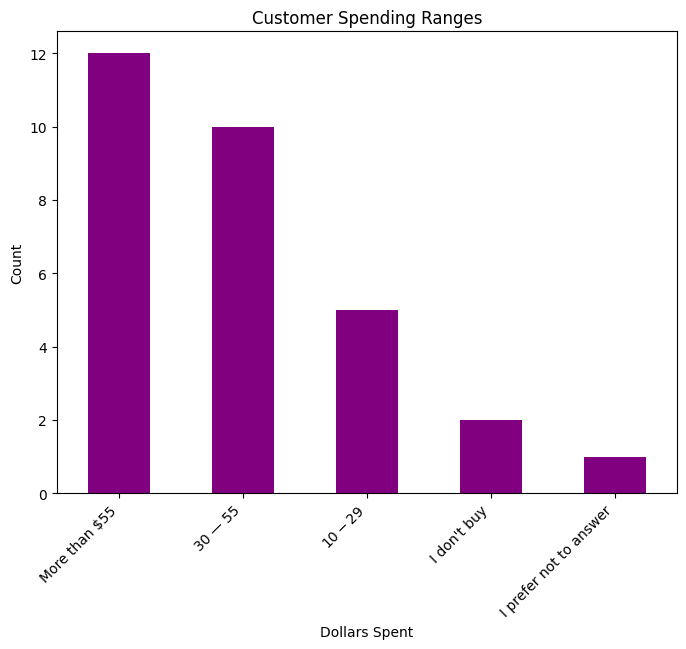

In [15]:

# Standardize text formats
df.loc[df['Dollars_Spent'].str.contains("I don't buy", case=False, na=False), 'Dollars_Spent'] = "I don't buy"
df.loc[df['Dollars_Spent'].str.contains(r'\$30', case=False, na=False), 'Dollars_Spent'] = '30 — 55'
df.loc[df['Dollars_Spent'].str.contains("30 — 55", case=False, na=False), 'Dollars_Spent'] = '30 — 55'
df.loc[df['Dollars_Spent'].str.contains("10 — 29", case=False, na=False), 'Dollars_Spent'] = '10 — 29'

# Function to split ranges with commas into separate rows
def split_rows(df, column):
    # Split rows containing multiple ranges separated by commas
    df_expanded = df[column].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).to_frame(column)
    
    return df_expanded

# Apply the function to 'Dollars_Spent'
df_expanded = split_rows(df, 'Dollars_Spent')

# Count the occurrences of each spending range
dollars_spent_counts = df_expanded['Dollars_Spent'].value_counts()

# Bar chart for spending amounts
dollars_spent_counts.plot(kind='bar', color='purple', figsize=(8, 6))
plt.title('Customer Spending Ranges')
plt.xlabel('Dollars Spent')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


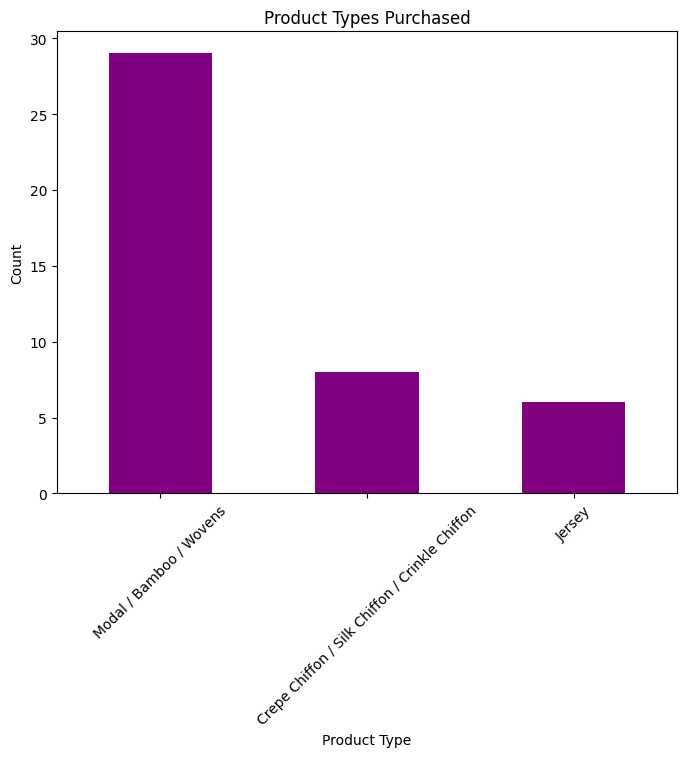

In [16]:
# Split 'Product_Type' and count each product type
product_counts = df['Product_Type'].str.split(', ').explode().value_counts()

# Bar chart for product types
product_counts.plot(kind='bar', color='Purple', figsize=(8, 6))
plt.title('Product Types Purchased')
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


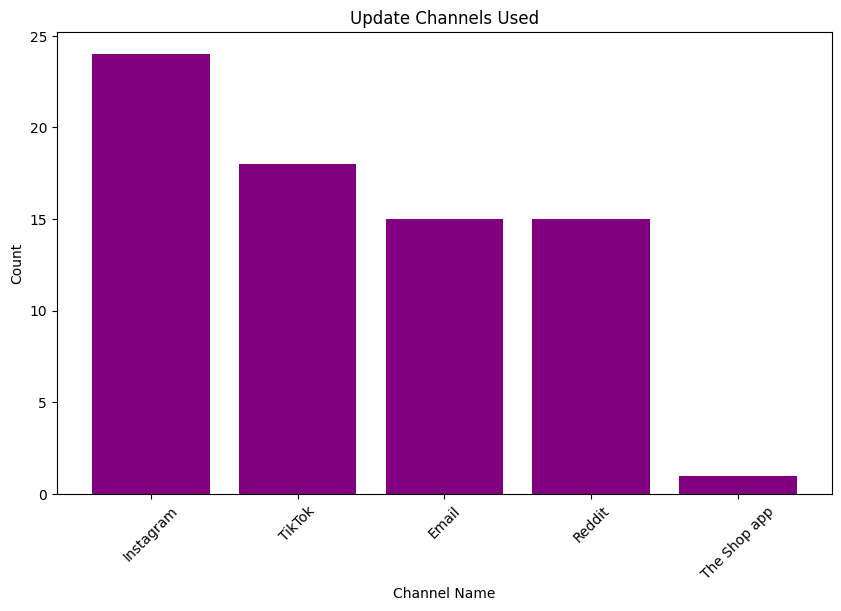

In [17]:
# Assuming df['Race'] contains the demographic data and combined values
# Step 1: Split the combined values by ',' and create a list of individual values
split_updates= df['Updates'].str.split(',')

# Step 2: Flatten the list and remove any extra spaces around the values
flat_updates= [item.strip() for sublist in split_updates for item in sublist]

# Step 3: Use Counter to count the occurrences of each individual race
updates_count = Counter(flat_updates)

# Step 4: Convert the Counter object to a DataFrame for easier plotting (optional)
updates_count_df = pd.DataFrame(updates_count.items(), columns=['Updates', 'Count'])
# Sort the race_counts_df by the 'Count' column in descending order
updates_count_df = updates_count_df.sort_values(by='Count', ascending=False)


# Step 5: Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(updates_count_df['Updates'], updates_count_df['Count'], color='purple')

plt.title('Update Channels Used')
plt.xlabel('Channel Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
